In [1]:
import pandas as pd

gpb=pd.read_csv('data/gpb.csv',encoding="shift-jis")
gpt=pd.read_csv('data/gp_each10min.csv',encoding="shift-jis")

In [2]:
df_ftv=gpt.loc[(gpt['局'] == 'FTV')]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日","timestamp"]]

#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')
df_ftv_rates.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,視聴率（世帯）,曜日,timestamp
datetime,,,
2019-12-31 22:10:00,4.7,火,1577830200
2019-12-31 22:20:00,7.0,火,1577830800
2019-12-31 22:30:00,5.9,火,1577831400
2019-12-31 22:40:00,5.0,火,1577832000
2019-12-31 22:50:00,5.9,火,1577832600


In [17]:
df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == '月')]
locs=df_loc.index.indexer_at_time('22:40:00')
ts_loc=df_loc.iloc[locs]
ts_loc.head()

,視聴率（世帯）,曜日,timestamp
datetime,,,
2017-01-02 22:40:00,6.2,月,1483396800
2017-01-09 22:40:00,8.4,月,1484001600
2017-01-16 22:40:00,8.9,月,1484606400
2017-01-23 22:40:00,6.7,月,1485211200
2017-01-30 22:40:00,6.1,月,1485816000


In [18]:
ftv_code=[]
ftv_title=[]

for index,row in ts_loc.iterrows():
    t=row.timestamp
    for a,b,c in zip(gpb.datetimets,gpb.endtimets,gpb["Unnamed: 0"]):
        if t in range(a,b):
            if gpb["局"][c]=="FTV":
                ftv_code.append(gpb["番組分類コード"][c])
                ftv_title.append(gpb["メインタイトル"][c])
            else:
                pass
        else:
            pass
                
ts_loc["番組分類コード"]=ftv_code
ts_loc["メインタイトル"]=ftv_title
ts_loc.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-02 22:40:00,6.2,月,1483396800,190,日本一うらやましいのは誰だ！？国民的お金持ちグランプリ
2017-01-09 22:40:00,8.4,月,1484001600,213,映画
2017-01-16 22:40:00,8.9,月,1484606400,214,映画
2017-01-23 22:40:00,6.7,月,1485211200,170,もしかしてズレてる？
2017-01-30 22:40:00,6.1,月,1485816000,170,もしかしてズレてる？


In [12]:
import collections
c=collections.Counter(ftv_title)
for k,v in c.most_common(5):
    print(k,v)

新説！所ＪＡＰＡＮ　　　　　　　　　　　　　　　　　　　　　 51
もしかしてズレてる？　　　　　　　　　　　　　　　　　　　　 38
世界の村のどエライさん　　　　　　　　　　　　　　　　　　　 28
映画　　　　　　　　　　　　　　　　　　　　　　　　　　　　 6
ＦＮＳ番組対抗オールスター秋の祭典目利き王決定戦　　　　　　 2


In [15]:
ttl=ts_loc["メインタイトル"]["2019-12-16 22:40:00"]
loc2=ts_loc.loc[(ts_loc['メインタイトル'] == ttl)]
loc2.head()

,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2018-10-22 22:40:00,6.0,月,1540248000,190,新説！所ＪＡＰＡＮ
2018-10-29 22:40:00,3.3,月,1540852800,190,新説！所ＪＡＰＡＮ
2018-11-05 22:40:00,5.0,月,1541457600,190,新説！所ＪＡＰＡＮ
2018-11-12 22:40:00,6.1,月,1542062400,190,新説！所ＪＡＰＡＮ
2018-11-19 22:40:00,5.2,月,1542667200,190,新説！所ＪＡＰＡＮ


In [68]:
loc3=ts_loc["2018-10-22 22:40:00":]

ftv_na=[]

for index,row in loc3.iterrows():
    if row["メインタイトル"]==ttl:
        ftv_na.append(row["視聴率（世帯）"])
    else:
        ftv_na.append(np.nan)
loc3["視聴率（修正）"]=ftv_na
loc3=loc3.apply(pd.Series.interpolate)
loc3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル,視聴率（修正）
datetime,,,,,,
2018-10-22 22:40:00,6.0,月,1540248000,190,新説！所ＪＡＰＡＮ,6.000000
2018-10-29 22:40:00,3.3,月,1540852800,190,新説！所ＪＡＰＡＮ,3.300000
2018-11-05 22:40:00,5.0,月,1541457600,190,新説！所ＪＡＰＡＮ,5.000000
2018-11-12 22:40:00,6.1,月,1542062400,190,新説！所ＪＡＰＡＮ,6.100000
2018-11-19 22:40:00,5.2,月,1542667200,190,新説！所ＪＡＰＡＮ,5.200000
2018-11-26 22:40:00,5.2,月,1543272000,190,新説！所ＪＡＰＡＮ,5.200000
2018-12-03 22:40:00,5.5,月,1543876800,190,新説！所ＪＡＰＡＮ,5.500000
2018-12-10 22:40:00,5.9,月,1544481600,190,新説！所ＪＡＰＡＮ,5.900000
2018-12-17 22:40:00,5.8,月,1545086400,190,新説！所ＪＡＰＡＮ,5.800000


In [69]:
ts=loc3["視聴率（修正）"]
ts.round(2)
ts.tail()

datetime
2019-12-02 22:40:00    5.6
2019-12-09 22:40:00    5.5
2019-12-16 22:40:00    5.6
2019-12-23 22:40:00    5.6
2019-12-30 22:40:00    5.6
Name: 視聴率（修正）, dtype: float64

In [70]:
import numpy as np
from scipy import stats

from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

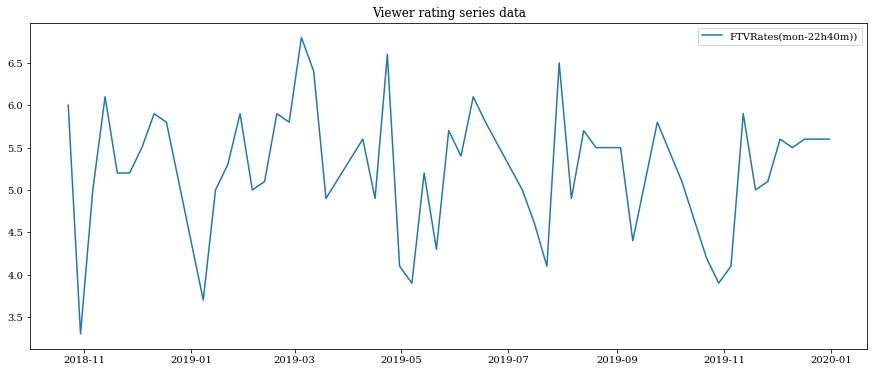

In [71]:
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

plt.plot(ts, label='FTVRates(mon-22h40m))')
plt.title('Viewer rating series data')
plt.legend(loc='best')

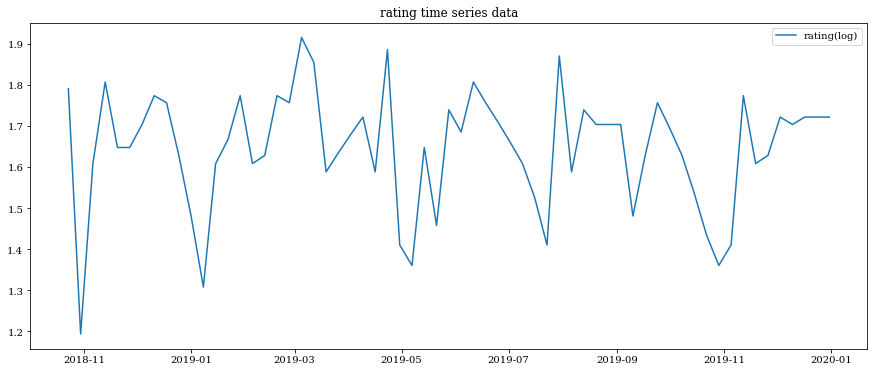

In [72]:
#対数をとって傾向を確認

ts_log = np.log(ts)
plt.plot(ts_log, label='rating(log)')
plt.title('rating time series data')
plt.legend(loc='best')

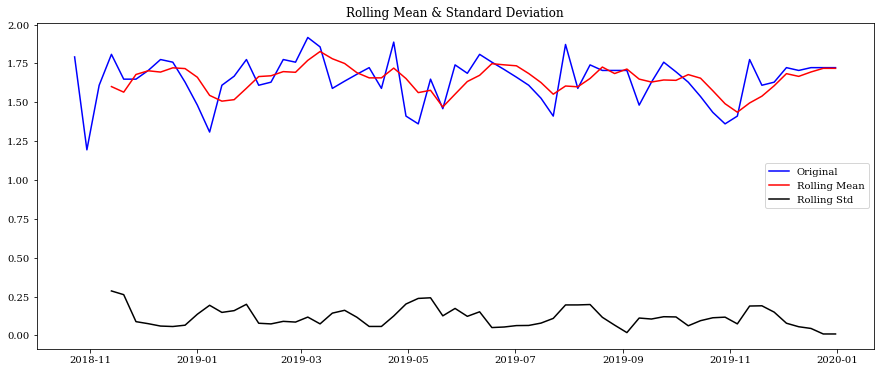

Results of Dickey-Fuller Test:
Test Statistic                -6.473102e+00
p-value                        1.351787e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.200000e+01
Critical Value (1%)           -3.540523e+00
Critical Value (5%)           -2.909427e+00
Critical Value (10%)          -2.592314e+00
dtype: float64


In [73]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts_log, window_size=4)


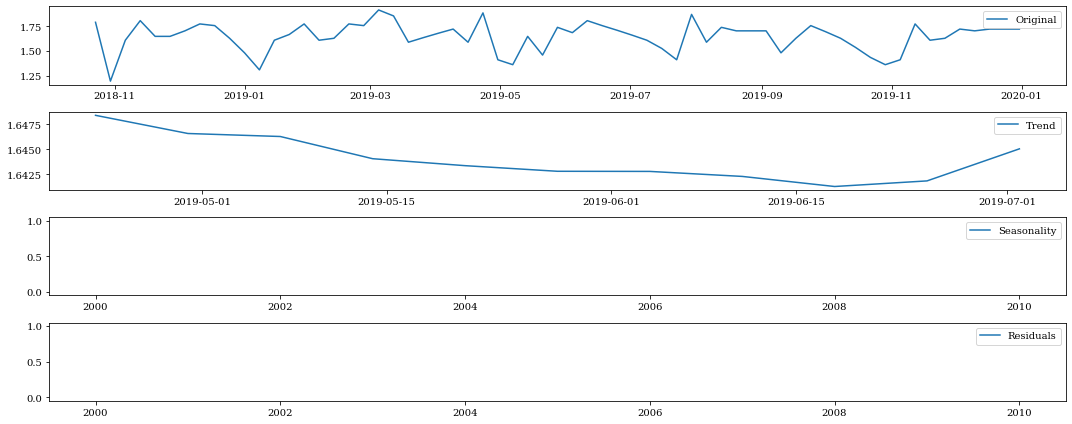

In [106]:

# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [83]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [84]:
import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequenc

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, Val

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Con

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, Val

In [85]:
# モデルごとの結果確認
print(modelSelection)
# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

                             model      aic
0    order=(1,0,0), season=(0,0,0)   169.47
1    order=(1,0,0), season=(0,0,1)  132.879
2    order=(1,0,0), season=(0,1,0)  143.622
3    order=(1,0,0), season=(0,1,1)  97.6897
4    order=(1,0,0), season=(1,0,0)  132.846
5    order=(1,0,0), season=(1,0,1)  134.874
6    order=(1,0,0), season=(1,1,0)  100.037
7    order=(1,0,0), season=(1,1,1)  95.8796
8    order=(1,0,1), season=(0,0,0)  143.442
9    order=(1,0,1), season=(0,0,1)  112.639
10   order=(1,0,1), season=(0,1,0)  138.335
11   order=(1,0,1), season=(0,1,1)  96.0505
12   order=(1,0,1), season=(1,0,0)   114.23
13   order=(1,0,1), season=(1,0,1)   114.64
14   order=(1,0,1), season=(1,1,0)  101.986
15   order=(1,0,1), season=(1,1,1)  96.1894
16   order=(1,0,2), season=(0,0,0)  132.915
17   order=(1,0,2), season=(0,0,1)  111.941
18   order=(1,0,2), season=(0,1,0)  137.696
19   order=(1,0,2), season=(0,1,1)  94.7675
20   order=(1,0,2), season=(1,0,0)  114.638
21   order=(1,0,2), season=(1,0,

In [86]:
import statsmodels.api as sm

p=2
d=0
q=3
sp=1
sd=1
sq=1

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,12), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            視聴率（修正）   No. Observations:                   63
Model:             SARIMAX(2, 0, 3)x(1, 1, 1, 12)   Log Likelihood                 -37.013
Date:                            Sun, 22 Mar 2020   AIC                             90.026
Time:                                    19:04:13   BIC                            102.468
Sample:                                10-22-2018   HQIC                            94.321
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3471      0.097     13.875      0.000       1.157       1.537
ar.L2         -0.8877      0.110   

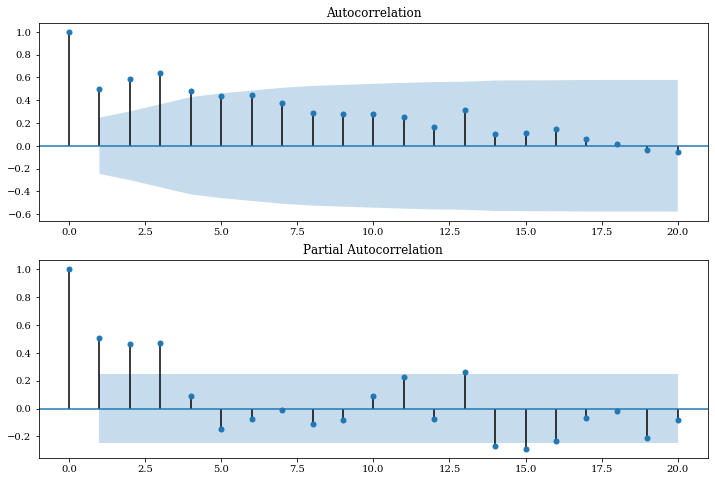

In [87]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=20, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=20, ax=ax2)

# 残差の自己相関については、ほぼ問題なくなったことを確認

In [141]:
# 予測
ts_pred = sarima.predict('2019-09-02', '2020-03-23')

predict_dy = sarima.get_prediction(start ='2019-09-02',end='2020-03-23')
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval


2019-10-07 22:40:00   6.17
2019-10-14 22:40:00   4.38
2019-10-21 22:40:00   4.73
2019-10-28 22:40:00   5.14
2019-11-04 22:40:00   4.70
2019-11-11 22:40:00   5.73
2019-11-18 22:40:00   5.55
2019-11-25 22:40:00   5.65
2019-12-02 22:40:00   5.35
2019-12-09 22:40:00   5.41
2019-12-16 22:40:00   5.46
2019-12-23 22:40:00   5.08
2019-12-30 22:40:00   5.12
2020-01-06 22:40:00   4.28
2020-01-13 22:40:00   5.52
2020-01-20 22:40:00   4.87
2020-01-27 22:40:00   5.22
2020-02-03 22:40:00   5.73
2020-02-10 22:40:00   5.44
2020-02-17 22:40:00   5.45
2020-02-24 22:40:00   4.86
2020-03-02 22:40:00   5.22
2020-03-09 22:40:00   5.65
2020-03-16 22:40:00   5.40
2020-03-23 22:40:00   5.25
Freq: W-MON, dtype: float64


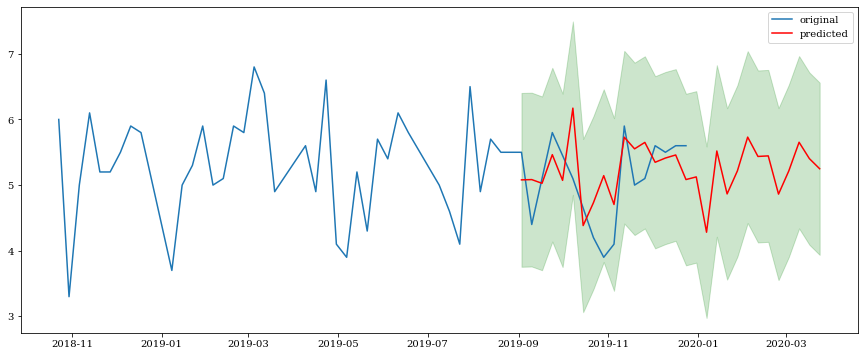

In [143]:
# 実データと予測結果の図示
plt.plot(ts[-365:-1], label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')
plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)

print(ts_pred[-25:])

In [101]:
p=ts_pred[-31:-17]
t=ts[-18:-5]

In [102]:
g=abs(t-p)
r=g/p*100

In [103]:
pd.options.display.float_format = '{:.2f}'.format

df2=pd.DataFrame({"予測":p, "実際":t,"誤差":g,"誤差率（%）":r})
df2.index.name = "日付"
df2

,予測,実際,誤差,誤差率（%）
日付,,,,
2019-09-02 22:40:00,5.08,5.50,0.42,8.28
2019-09-09 22:40:00,5.08,4.40,0.68,13.45
2019-09-16 22:40:00,5.03,5.10,0.07,1.45
2019-09-23 22:40:00,5.46,5.80,0.34,6.15
2019-09-30 22:40:00,5.07,5.45,0.38,7.45
2019-10-07 22:40:00,6.17,5.10,1.07,17.37
2019-10-14 22:40:00,4.38,4.65,0.27,6.08
2019-10-21 22:40:00,4.73,4.20,0.53,11.24
2019-10-28 22:40:00,5.14,3.90,1.24,24.19


In [104]:
#RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t, p))

0.6177023861897035

In [105]:
#MAPE

import numpy as np
np.mean(np.abs((p - t) / t)) * 100



11.396068758376163

In [134]:
#外れ原因調査

t=loc3["timestamp"]["2019-10-28 22:40:00"]
result=gpb.loc[(gpb.datetimets<t)&(gpb.endtimets>t)]
result.drop(columns=["Unnamed: 0","年","月","日","開始時","開始分","datetimets","endtimets"])

,datetime,曜日,局,放送分数,番組分類コード,新番組コード,占拠率（世帯）,メインタイトル,サブタイトル,endtime
55009,2019-10-28 22:00:00,月,NTV,60,190,,11.80,しゃべくり００７,,2019-10-28 23:00:00
55011,2019-10-28 21:00:00,月,TBS,117,190,,7.40,１番だけが知っているＳＰ,,2019-10-28 22:57:00
55017,2019-10-28 22:00:00,月,FTV,54,190,,4.70,新説！所ＪＡＰＡＮ,,2019-10-28 22:54:00
55022,2019-10-28 21:54:00,月,ANB,76,010,,12.80,報道ステーション,,2019-10-28 23:10:00
55028,2019-10-28 22:00:00,月,TX,54,320,,3.70,ドラマＢｉｚ,ハル・総合商社の女,2019-10-28 22:54:00
55036,2019-10-28 22:00:00,月,NHK1,50,030,,4.10,逆転人生,,2019-10-28 22:50:00
55056,2019-10-28 22:25:00,月,NHK2,25,072,,0.90,１００分ｄｅ名著・最終回,,2019-10-28 22:50:00
